In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
tour = pd.read_csv('tourism_dataset.csv')

In [ ]:
tour

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No
...,...,...,...,...,...,...,...
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,No
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes


In [ ]:
tour['Visitors'].describe()

,Visitors
count,5989.000000
mean,501016.089497
std,289783.294978
min,1108.000000
25%,252789.000000
50%,500831.000000
75%,751371.000000
max,999982.000000


In [ ]:
tour.groupby('Country')['Visitors'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,830.0,501250.608434,293342.060201,2504.0,247786.00,510568.0,760267.00,999750.0
Brazil,840.0,493206.569048,289933.396048,1261.0,244459.75,494187.5,738437.00,998327.0
China,806.0,501796.987593,286411.059883,1385.0,258400.00,505055.0,742384.75,999982.0
Egypt,912.0,502821.986842,292970.214048,1108.0,264945.75,488856.0,769607.00,999891.0
France,857.0,495851.366394,290145.333741,1855.0,249926.00,494935.0,739856.00,999855.0
India,896.0,503440.853795,286716.570187,1382.0,253627.50,516466.5,745448.50,997922.0
USA,848.0,508495.503538,289487.885490,1441.0,265488.50,501359.0,763291.75,999197.0


In [ ]:
tour.groupby('Country')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,830.0,3.019602,1.171634,1.00,1.8925,3.135,4.0375,5.00
Brazil,840.0,3.074167,1.141223,1.01,2.1100,3.115,4.0200,4.98
China,806.0,2.958648,1.177937,1.00,1.9100,2.875,4.0050,5.00
Egypt,912.0,3.024298,1.128679,1.00,2.0600,3.000,3.9900,5.00
France,857.0,3.030268,1.170743,1.00,2.0300,3.010,4.0500,5.00
India,896.0,2.973158,1.161215,1.00,1.9800,2.970,3.9825,4.99
USA,848.0,2.984304,1.142410,1.00,2.0600,2.950,3.8750,5.00


In [ ]:
tour.groupby('Country')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,830.0,497184.737663,286505.557442,2472.45,245003.0500,502525.620,737238.2550,999200.95
Brazil,840.0,508075.238417,289599.805577,2168.15,258355.0000,501841.415,772083.6400,999514.08
China,806.0,494332.975496,283840.963544,1897.79,257998.8900,479148.945,733881.3475,999410.89
Egypt,912.0,505038.149704,283739.502090,1103.02,272291.6850,497629.515,746019.3575,996714.45
France,857.0,479027.587246,281670.312173,1025.81,238455.2600,460791.710,710621.0500,999999.49
India,896.0,507451.226953,285242.996333,1227.89,256276.9375,520109.790,746612.3100,999821.20
USA,848.0,504369.440507,296467.817261,1374.83,232376.3075,502185.390,771064.9400,997041.25


In [ ]:
(tour[['Visitors', 'Revenue']]).corr()

,Visitors,Revenue
Visitors,1.000000,0.008358
Revenue,0.008358,1.000000


In [ ]:
(tour[['Visitors', 'Rating']]).corr()

,Visitors,Rating
Visitors,1.000000,-0.010337
Rating,-0.010337,1.000000


In [ ]:
(tour[['Rating', 'Revenue']]).corr()

,Rating,Revenue
Rating,1.000000,0.000574
Revenue,0.000574,1.000000


In [ ]:
AY = tour[(tour['Category']=='Adventure') & (tour['Accommodation_Available']=='Yes')]['Location'].count()
AN = tour[(tour['Category']=='Adventure') & (tour['Accommodation_Available']=='No')]['Location'].count()
UY = tour[(tour['Category']=='Urban') & (tour['Accommodation_Available']=='Yes')]['Location'].count()
UN = tour[(tour['Category']=='Urban') & (tour['Accommodation_Available']=='No')]['Location'].count()
CY = tour[(tour['Category']=='Cultural') & (tour['Accommodation_Available']=='Yes')]['Location'].count()
CN = tour[(tour['Category']=='Cultural') & (tour['Accommodation_Available']=='No')]['Location'].count()
BY = tour[(tour['Category']=='Beach') & (tour['Accommodation_Available']=='Yes')]['Location'].count()
BN = tour[(tour['Category']=='Beach') & (tour['Accommodation_Available']=='No')]['Location'].count()
HY = tour[(tour['Category']=='Historical') & (tour['Accommodation_Available']=='Yes')]['Location'].count()
HN = tour[(tour['Category']=='Historical') & (tour['Accommodation_Available']=='No')]['Location'].count()
NY = tour[(tour['Category']=='Nature') & (tour['Accommodation_Available']=='Yes')]['Location'].count()
NN = tour[(tour['Category']=='Nature') & (tour['Accommodation_Available']=='No')]['Location'].count()

yes = pd.Series([AY, UY, CY, BY, HY, NY])
no = pd.Series([AN, UN, CN, BN, HN, NN])

tour_cat_acc = pd.DataFrame({'Yes': yes, 'No': no})
tour_cat_acc.index = ['Adventure', 'Urban', 'Cultural', 'Beach', 'Historical', 'Nature']
tour_cat_acc



,Yes,No
Adventure,501,536
Urban,499,507
Cultural,491,507
Beach,521,477
Historical,507,487
Nature,494,462


In [ ]:
tour_ca = pd.DataFrame(tour.groupby(['Category', 'Accommodation_Available']).size())
tour_ca = tour_ca.unstack('Accommodation_Available')
tour_ca.columns = tour_ca.columns.droplevel()
yn = pd.DataFrame(tour_ca['No']+tour_ca['Yes'])
con_table = pd.merge(tour_ca,yn,how='inner',on='Category')
con_table.columns = ['No', 'Yes', 'Total']
con_table.loc['Total'] = con_table.sum()
con_table

,No,Yes,Total
Category,,,
Adventure,536,501,1037
Beach,477,521,998
Cultural,507,491,998
Historical,487,507,994
Nature,462,494,956
Urban,507,499,1006
Total,2976,3013,5989


In [ ]:
list_a = []
for i in range(len(con_table['Total'])-1):
    for j in range(len(con_table.loc['Total'])-1):
        # print((con_table['Total'].iloc[i]*con_table.loc['Total'].iloc[j])/con_table['Total'].sum())
        Eij = (con_table['Total'].iloc[i]*con_table.loc['Total'].iloc[j])/con_table['Total']['Total']
        # print(con_table.iloc[i,j],Eij)
        list_a += [(  (  con_table.iloc[i,j]-Eij  )**2  ) / Eij]
        # print(con_table.iloc[i,j])

print(list_a)
sum(list_a)

[0.8318046314587666, 0.8215899711985692, 0.7216119328631373, 0.7127504521077653, 0.24768019842651925, 0.24463865599645582, 0.09721728731973953, 0.0960234474157135, 0.35832693076619726, 0.3539266332426827, 0.10105571197289073, 0.09981473575550044]


4.686440588523938

In [ ]:
arr = tour['Revenue'].to_numpy()
stt = stats.describe(arr)
stt

DescribeResult(nobs=5989, minmax=(1025.81, 999999.49), mean=499479.3672532978, variance=82221677204.18973, skewness=0.009466253371012433, kurtosis=-1.1828879057501234)

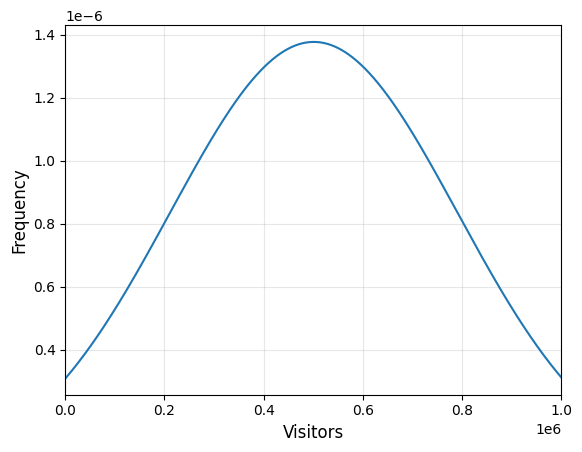

In [ ]:
# Calculating mean and Stdev of AGW
df_mean = np.mean(tour['Visitors'])
df_std = np.std(tour['Visitors'])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(tour['Visitors'].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(tour['Visitors'].sort_values(), pdf)
plt.xlim([0,1000000])
plt.xlabel("Visitors", size=12)
plt.ylabel("Frequency", size=12)
plt.grid(True, alpha=0.3, linestyle="solid")
plt.show()

In [ ]:
stats.zscore(tour['Visitors']).sort_values()

,Visitors
2595,-1.725254
2310,-1.724726
2845,-1.724309
4298,-1.724298
4160,-1.724105
...,...
2030,1.720905
1930,1.721202
2982,1.721564
2311,1.721688


Text(0, 0.5, 'Frequency')

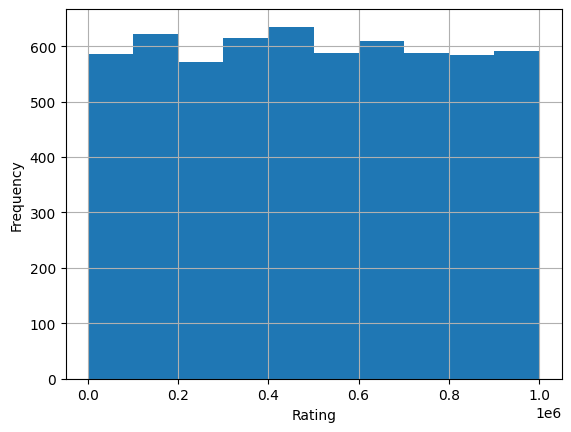

In [ ]:
tour['Revenue'].hist()

plt.xlabel("Rating")
plt.ylabel("Frequency")


<Axes: ylabel='Density'>

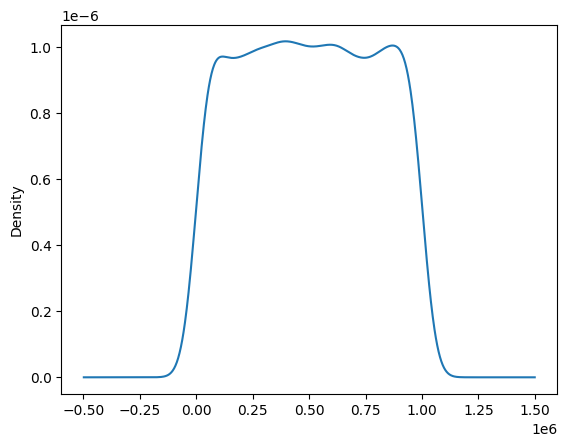

In [ ]:
tour['Visitors'].plot(kind='density')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='Country', ylabel='Visitors'>

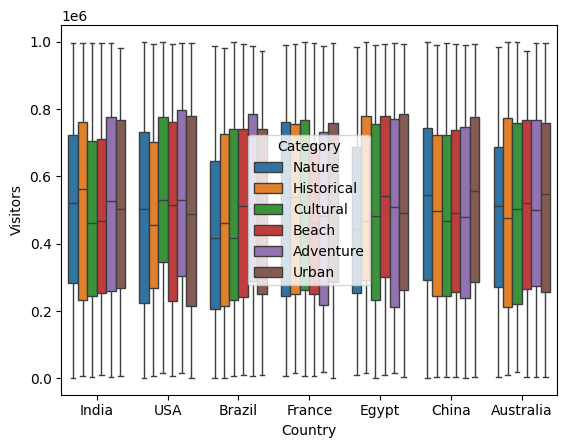

In [ ]:
sns.boxplot(x='Country', y='Visitors', hue='Category', data=tour)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

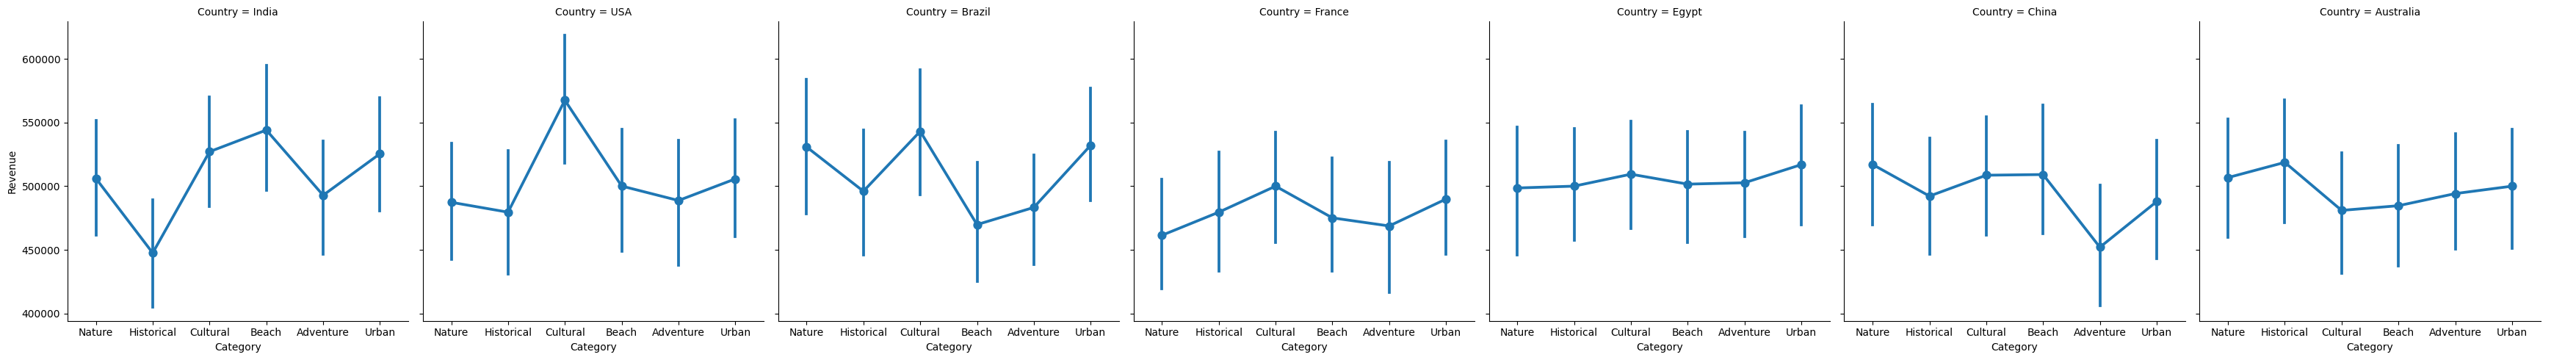

In [ ]:
%matplotlib inline
sns.catplot(x="Category", y="Revenue", col="Country", data=tour, kind="point")

<Axes: ylabel='Density'>

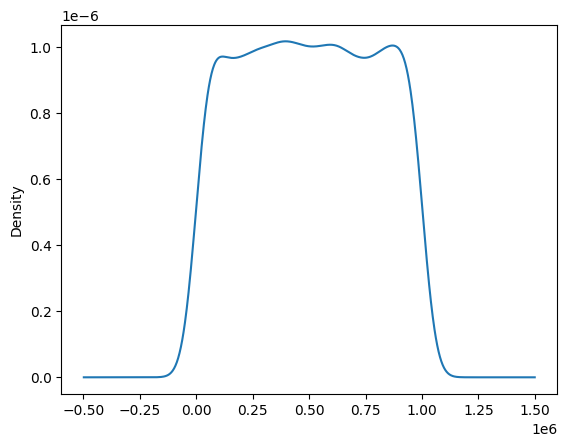

In [ ]:
tour['Visitors'].plot(kind='density')

In [ ]:
con_data =  tour.groupby('Country')[['Location']].nunique().sort_values(by='Location', ascending=False)
print(con_data)

           Location
Country            
Egypt           912
India           896
France          857
USA             848
Brazil          840
Australia       830
China           806


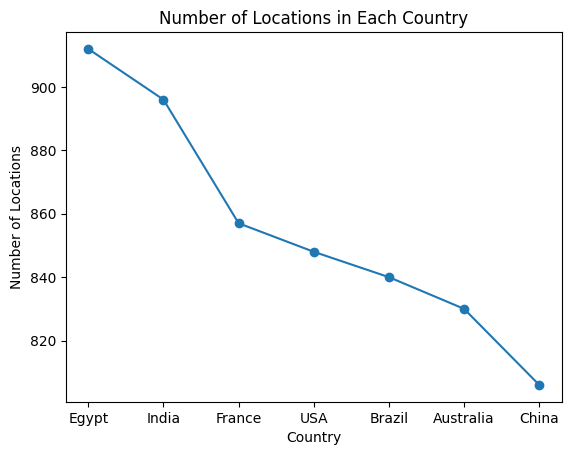

In [ ]:
plt.plot(con_data.index, con_data['Location'], marker='o')
plt.xlabel("Country")
plt.ylabel("Number of Locations")
plt.title("Number of Locations in Each Country")
plt.show()

In [ ]:
iPC = tour.groupby(['Category', 'Country'])[['Location']].nunique()
iPC = iPC.unstack('Category')
iPC.columns = iPC.columns.droplevel()
print(iPC)

Category   Adventure  Beach  Cultural  Historical  Nature  Urban
Country                                                         
Australia        148    148       139         134     133    128
Brazil           160    136       140         148     116    140
China            139    135       136         135     133    128
Egypt            165    155       152         157     129    154
France           124    147       148         132     164    142
India            159    153       149         147     136    152
USA              142    124       134         141     145    162


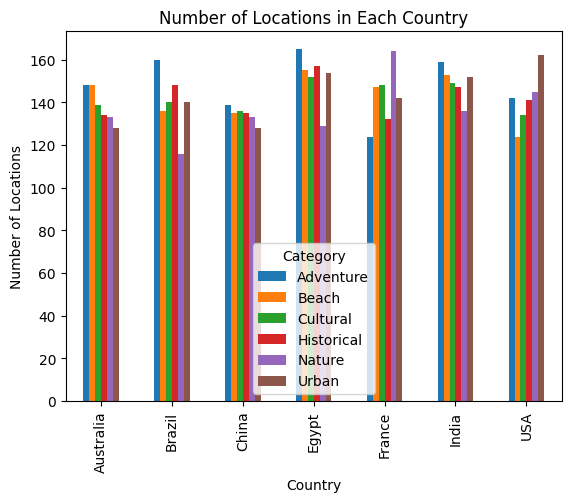

In [ ]:
# Graph Category in Each Country
iPC.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Locations")
plt.title("Number of Locations in Each Country")

plt.show()

In [ ]:
# Find Most Rating Country
tour.groupby('Country')['Rating'].mean().sort_values(ascending=False)

,Rating
Country,
Brazil,3.074167
France,3.030268
Egypt,3.024298
Australia,3.019602
USA,2.984304
India,2.973158
China,2.958648


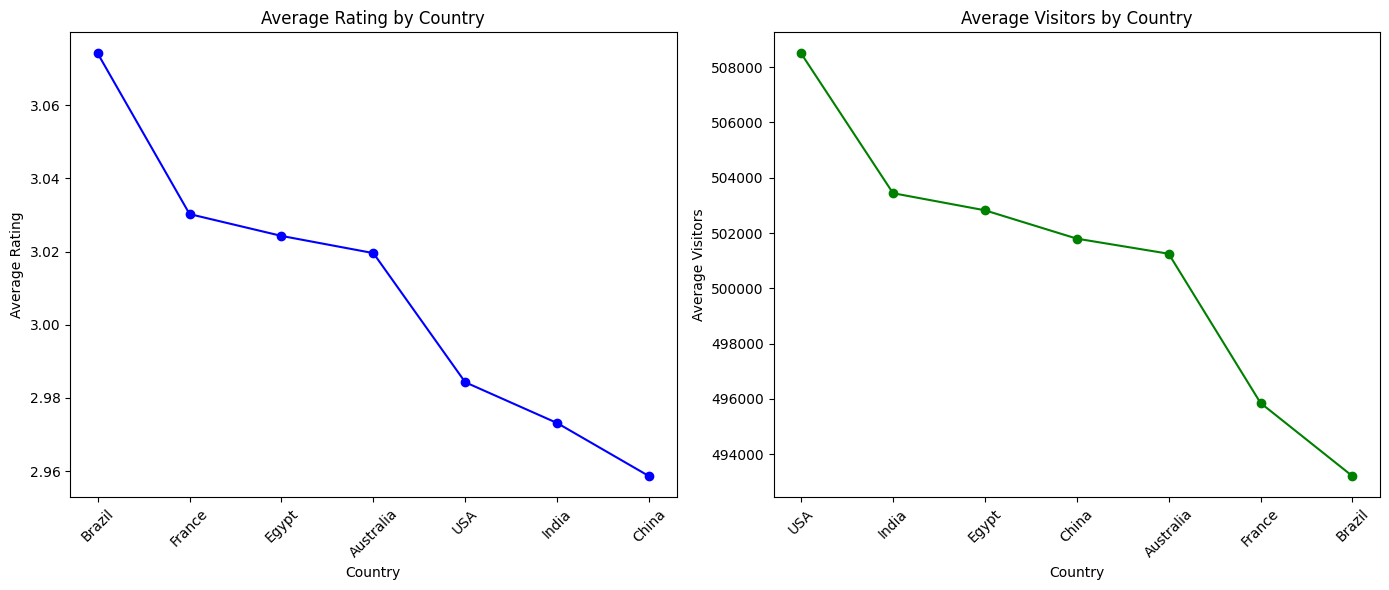

In [ ]:
# Graph of Rating Country
rating_data = tour.groupby('Country')[['Rating']].mean().sort_values(by='Rating', ascending=False)
visitor_data = tour.groupby('Country')[['Visitors']].mean().sort_values(by='Visitors', ascending=False)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # Adjusted figure size for better clarity

# Plot the first graph (Ratings by Country)
ax[0].plot(rating_data.index, rating_data['Rating'], marker='o', color='blue')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Average Rating')
ax[0].set_title('Average Rating by Country')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot the second graph (Visitors by Country)
ax[1].plot(visitor_data.index, visitor_data['Visitors'], marker='o', color='green')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Average Visitors')
ax[1].set_title('Average Visitors by Country')
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

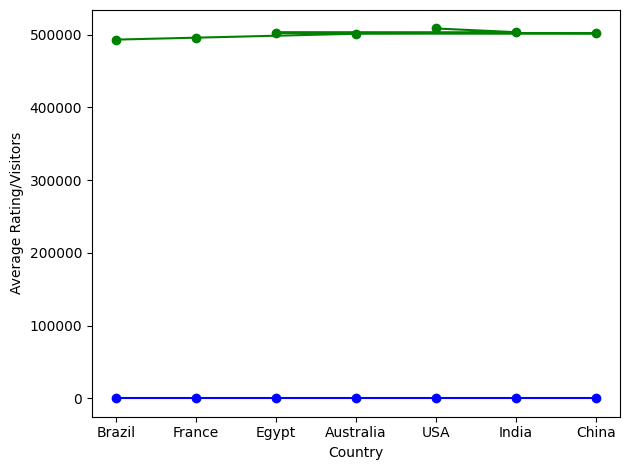

In [ ]:
# Graph of Rating Country
rating_data = tour.groupby('Country')[['Rating']].mean().sort_values(by='Rating', ascending=False)
visitor_data = tour.groupby('Country')[['Visitors']].mean().sort_values(by='Visitors', ascending=False)

# Create subplots
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # Adjusted figure size for better clarity
plt.plot(rating_data.index, rating_data['Rating'], marker='o', color='blue')
plt.plot(visitor_data.index, visitor_data['Visitors'], marker='o', color='green')
plt.xlabel('Country')
plt.ylabel('Average Rating/Visitors')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()